In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [13]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names=['spal_len','sepal_wid','petal_len','petal_wid','class']
dataset = pd.read_csv(url,names=names , header=None )
dataset.head()

,spal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
#pre_Processing
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(dataset.iloc[: , :-1])  # seperate target from dataframe

In [27]:
#PCA

from sklearn.decomposition import  PCA
pca = PCA(n_components=2).fit_transform(data)

# data.shape       # (150, 4)
# pca.shape     # (150, 2)

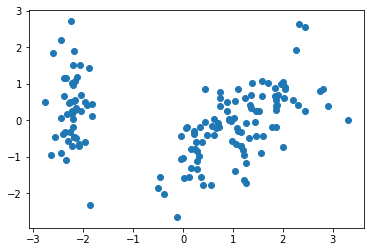

In [30]:
plt.scatter(pca[:,0],pca[:,1] )

In [43]:
principalDf = pd.DataFrame(data = pca
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, dataset[['class']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<Figure size 144x144 with 0 Axes>